In [1]:
print('Hello World')

Hello World


In [ ]:
!pip install pandas scikit-learn

In [4]:
!wget https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/adresowo_lodz_cleaned.csv

--2025-11-22 12:25:33--  https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/adresowo_lodz_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140154 (137K) [text/plain]
Saving to: ‘adresowo_lodz_cleaned.csv’

adresowo_lodz_clean 100%[===================>] 136,87K  --.-KB/s    in 0,06s   

2025-11-22 12:25:34 (2,29 MB/s) - ‘adresowo_lodz_cleaned.csv’ saved [140154/140154]



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# === 1. Wczytanie danych ===
url = "adresowo_lodz_cleaned.csv"
df = pd.read_csv(url).dropna(subset=['price_total_zl_cleaned', 'area_m2'])

In [6]:
df.head()

,id,url,date_posted,photos,locality,street,property_type,rooms,area_m2,owner_direct,price_total_zl,price_per_m2_zl,price_total_zl_cleaned,price_per_m2_zl_cleaned
0,3740608,https://adresowo.pl/o/mieszkanie-lodz-baluty-u...,6 dni temu,16.0,Łódź Bałuty,ul. Antoniego Mackiewicza,Mieszkanie,2,47,True,315 000,6 702zł / m²,315000.0,6702.0
1,3747664,https://adresowo.pl/o/mieszkanie-lodz-gorna-ul...,dzisiajnowe,11.0,Łódź Górna,ul. Ignacego Paderewskiego,Mieszkanie,2,37,True,295 000,7 973zł / m²,295000.0,7973.0
2,3747648,https://adresowo.pl/o/mieszkanie-lodz-baluty-u...,dzisiajnowe,11.0,Łódź Bałuty,ul. Rojna,Mieszkanie,2,45,True,309 000,6 847zł / m²,309000.0,6847.0
3,3747458,https://adresowo.pl/o/mieszkanie-lodz-srodmies...,dzisiajnowe,13.0,Łódź Śródmieście,ul. Gdańska,Mieszkanie,5,125,True,699 000,5 614zł / m²,699000.0,5614.0
4,3746066,https://adresowo.pl/o/mieszkanie-lodz-ul-ignac...,dzisiajnowe,10.0,Łódź,ul. Ignacego Paderewskiego,Mieszkanie,2,38,True,365 000,9 605zł / m²,365000.0,9605.0


In [11]:
# === Statystyki streszczające dane ===

print("=" * 80)
print("STATYSTYKI: ŚREDNIA, MEDIANA I KWANTYLE")
print("=" * 80)

# Statystyki dla wszystkich kolumn numerycznych
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

if len(numeric_cols) > 0:
    for col in numeric_cols:
        print(f"\n--- {col.upper()} ---")
        print(f"Średnia: {df[col].mean():,.2f}")
        print(f"Mediana: {df[col].median():,.2f}")
        print(f"Q1 (25%): {df[col].quantile(0.25):,.2f}")
        print(f"Q2 (50%): {df[col].quantile(0.50):,.2f}")
        print(f"Q3 (75%): {df[col].quantile(0.75):,.2f}")
else:
    print("Brak kolumn numerycznych w zbiorze danych")

print("\n" + "=" * 80)


STATYSTYKI: ŚREDNIA, MEDIANA I KWANTYLE

--- ID ---
Średnia: 3,549,332.43
Mediana: 3,654,400.00
Q1 (25%): 3,528,557.00
Q2 (50%): 3,654,400.00
Q3 (75%): 3,717,352.00

--- PHOTOS ---
Średnia: 11.04
Mediana: 9.00
Q1 (25%): 8.00
Q2 (50%): 9.00
Q3 (75%): 14.00

--- ROOMS ---
Średnia: 2.38
Mediana: 2.00
Q1 (25%): 2.00
Q2 (50%): 2.00
Q3 (75%): 3.00

--- AREA_M2 ---
Średnia: 53.38
Mediana: 48.00
Q1 (25%): 38.00
Q2 (50%): 48.00
Q3 (75%): 62.00

--- PRICE_TOTAL_ZL_CLEANED ---
Średnia: 467,597.69
Mediana: 413,000.00
Q1 (25%): 330,000.00
Q2 (50%): 413,000.00
Q3 (75%): 539,500.00

--- PRICE_PER_M2_ZL_CLEANED ---
Średnia: 8,909.37
Mediana: 8,538.00
Q1 (25%): 7,550.00
Q2 (50%): 8,538.00
Q3 (75%): 10,000.00

--- PRICE_PER_SQM ---
Średnia: 8,911.09
Mediana: 8,538.06
Q1 (25%): 7,555.56
Q2 (50%): 8,538.06
Q3 (75%): 10,000.00



In [14]:

# === 2. Definicja cech i celu ===
X = df[['area_m2', 'locality', 'rooms', 'photos']]
y = df['price_total_zl_cleaned']

# === 3. Podział na zbiory treningowy/testowy ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
X_train

,area_m2,locality,rooms,photos
430,54,Łódź Księży Młyn,2,17.0
249,55,Łódź Górna,3,20.0
220,50,Łódź Śródmieście,2,13.0
18,53,Łódź Bałuty,3,9.0
244,38,Łódź Polesie,1,8.0
...,...,...,...,...
71,57,Łódź Radogoszcz,3,18.0
106,40,Łódź Śródmieście,2,21.0
270,60,Łódź Śródmieście,4,8.0
435,68,Łódź Widzew,3,10.0


In [19]:
X_test

,area_m2,locality,rooms,photos
646,37,Łódź Julianów,2,8.0
336,118,Łódź Śródmieście,3,9.0
63,90,Łódź Julianów,3,14.0
367,44,Łódź Widzew,2,8.0
101,39,Łódź Dąbrowa,2,10.0
...,...,...,...,...
110,46,Łódź Śródmieście,2,8.0
82,37,Łódź,2,10.0
51,40,Łódź Bałuty,2,12.0
617,27,Łódź Śródmieście,1,9.0


In [20]:
y_test

646    280000.0
336    750000.0
63     649360.0
367    420000.0
101    340000.0
         ...   
110    475000.0
82     329000.0
51     590000.0
617    329000.0
545    769000.0
Name: price_total_zl_cleaned, Length: 136, dtype: float64

In [21]:
X.isna().sum()

area_m2     0
locality    0
rooms       0
photos      1
dtype: int64

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# === 4. Imputacja (opcjonalna) ===
imputer = IterativeImputer(random_state=0)

# === 5. Definicja kolumn numerycznych i kategorycznych ===
numeric_features = ['area_m2', 'rooms', 'photos']
categorical_features = ['locality']



In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# === 6. ColumnTransformer: preprocessing ===
preprocessor = ColumnTransformer(
   transformers=[
      ('num', Pipeline([
           ('imputer', imputer),
           ('scaler', StandardScaler())
       ]), numeric_features),
       ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   ]
)


In [27]:
# === 6. ColumnTransformer: preprocessing ===
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# === 7. Pipeline z modelem ===
pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),
   ('regressor', DecisionTreeRegressor(random_state=42))
])

# === 7b. Optymalizacja hiperparametrów ===
param_grid = {
    'regressor__max_depth': [8, 10, 12, 15, 20],
    'regressor__min_samples_split': [2, 5, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 4, 8],
    'regressor__max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Rozpoczynam optymalizację hiperparametrów...")
grid_search.fit(X_train, y_train)

print(f"\nNajlepsze hiperparametry: {grid_search.best_params_}")
print(f"Najlepszy R² (cross-validation): {grid_search.best_score_:.3f}")

# Użyj najlepszego modelu
pipeline = grid_search.best_estimator_



Rozpoczynam optymalizację hiperparametrów...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Najlepsze hiperparametry: {'regressor__max_depth': 8, 'regressor__max_features': None, 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 20}
Najlepszy R² (cross-validation): 0.500


R² na zbiorze testowym: 0.656


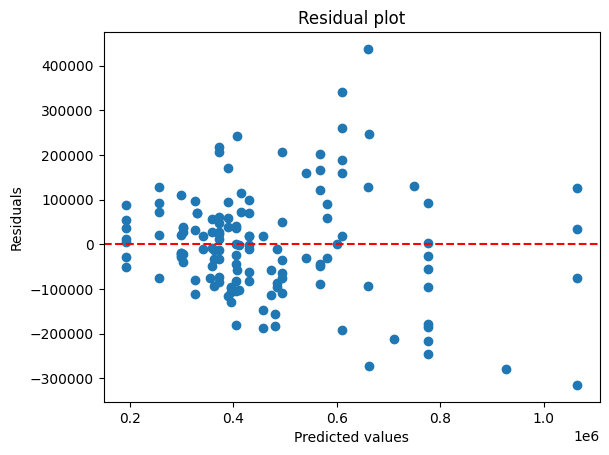

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# === 9. Predykcja i ocena (model już wytrenowany przez GridSearchCV) ===
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² na zbiorze testowym: {r2:.3f}")

# === 10. Wykres reszt ===
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()



In [29]:
X_new = pd.DataFrame(
   [[47, 'Łódź Bałuty', 2, 16.0]],
   columns=['area_m2', 'locality', 'rooms', 'photos']
)
predicted_price = pipeline.predict(X_new)
print(f"Predykowana cena: {predicted_price[0]:,.2f} zł")

Predykowana cena: 404,573.87 zł


In [30]:
import joblib
# === 12. Zapis modelu ===
joblib.dump(pipeline, "model_random_forest_adresowo_lodz.pkl")
print("✅ Model zapisano jako 'model_random_forest_adresowo_lodz.pkl'")


✅ Model zapisano jako 'model_random_forest_adresowo_lodz.pkl'


In [31]:
import joblib
# === 13. Wczytanie modelu ===
loaded_pipeline = joblib.load("model_random_forest_adresowo_lodz.pkl")
print("✅ Model wczytano pomyślnie.")


✅ Model wczytano pomyślnie.


In [32]:
loaded_pipeline.predict(X_new)

array([404573.86842105])